# Prediction of Concrete Compressive Strength using Multiple Linear Regression
### Abdulwahid
### 4/21/2022

## 1. Import Libraries
The given libraries contain functions that are requirement to the project

In [51]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

## 2. Load Dataset
Using pandas library the dataset is read through the ***read_csv*** function and the ***head*** function is used to read the first five rows.

In [52]:
dataFrame=pd.read_csv(r'C:\Users\DELL\Desktop\Fall 2021\Scientific Programming\Concrete_Data.csv')
dataFrame.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,NaN,270.0,40.27
3,332.5,142.5,0.0,NaN,0.0,932.0,594.0,365.0,NaN
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30


## 3. Data Preprocessing
### Sum of Null Values
The ***isnull*** function detects the null values while the ***sum*** function adds up all null values corresponding to a column.

In [53]:
dataFrame.isnull().sum()

Cement                           2
Blast_Furnace_Slag               2
Fly_Ash                          2
Water                            2
Superplasticizer                 1
Coarse_Aggregate                 2
Fine_Aggregate                   2
Age                              2
Concrete_compressive_strength    2
dtype: int64

### Median of Cement Column
The **math** library is used to access the ***median*** function that is used to calcluate the middle value of cement column

In [54]:
import math
mdn=math.floor(dataFrame.Cement.median())
mdn

272

### Mean of Cement Column
The **math** library is used to access the ***mean*** function that is used to calcluate the average of water column

In [55]:
mn=math.floor(dataFrame.Water.mean())
mn

181

### Mode of Cement Column
The **math** library is used to access the ***mode*** function that is used to calcluate the highest value of superplasticizer column

In [56]:
md=math.floor(dataFrame.Superplasticizer.mode())
md

0

### Fill missing values (Cement)
The median value found for cement column is used to replace all missing values in that (cement) column

In [57]:
dataFrame.Cement=dataFrame.Cement.fillna(mdn)
dataFrame

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,NaN,270.0,40.27
3,332.5,142.5,0.0,NaN,0.0,932.0,594.0,365.0,NaN
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


### Fill missing values (Water)
The mean value found for water column is used to replace all missing values in that (water) column

In [58]:
dataFrame.Water=dataFrame.Water.fillna(mn)
dataFrame

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,NaN,270.0,40.27
3,332.5,142.5,0.0,181.0,0.0,932.0,594.0,365.0,NaN
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


### Fill missing values (Superplasticizer)
The mode value found for Superplasticizer column is used to replace all missing values in that (Superplasticizer) column

In [59]:
dataFrame.Age=dataFrame.Superplasticizer.fillna(md)
dataFrame

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,2.5,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,2.5,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,NaN,0.0,40.27
3,332.5,142.5,0.0,181.0,0.0,932.0,594.0,0.0,NaN
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,0.0,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,8.9,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,10.4,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,6.1,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,11.3,32.77


### Sum of Null Values (Checking)
Apart from cement, superplasticizer and water columns the rest of the coloumns still contain missing values.

In [60]:
dataFrame.isnull().sum()

Cement                           0
Blast_Furnace_Slag               2
Fly_Ash                          2
Water                            0
Superplasticizer                 1
Coarse_Aggregate                 2
Fine_Aggregate                   2
Age                              0
Concrete_compressive_strength    2
dtype: int64

### Eliminate Missing Values
The ***dropna*** function is used to delete rows with missing values

In [61]:
dataFrame=dataFrame.dropna()

### Sum of Null Values (Final check)
Now all columns do not contain any missing values

In [62]:
dataFrame.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64

## 4. Exploratory Data Analysis
### Correlation Matrix
1. it is observed that cement has the strongest relation with concrete strength 
2. superplasticizer has positive correlation of 0.366 which is second highest. 
3. Lastly, age has least positive correlation with concrete strength. 

Pearson correlation coefficient matrix of each variables:
                                  Cement     Water  Superplasticizer  \
Cement                         1.000000 -0.093098          0.096701   
Water                         -0.093098  1.000000         -0.654712   
Superplasticizer               0.096701 -0.654712          1.000000   
Coarse_Aggregate              -0.106352 -0.177399         -0.271020   
Fine_Aggregate                -0.215689 -0.433252          0.211922   
Age                            0.096701 -0.654712          1.000000   
Concrete_compressive_strength  0.499432 -0.303561          0.372221   

                               Coarse_Aggregate  Fine_Aggregate       Age  \
Cement                                -0.106352       -0.215689  0.096701   
Water                                 -0.177399       -0.433252 -0.654712   
Superplasticizer                      -0.271020        0.211922  1.000000   
Coarse_Aggregate                       1.000000       -0.189736 

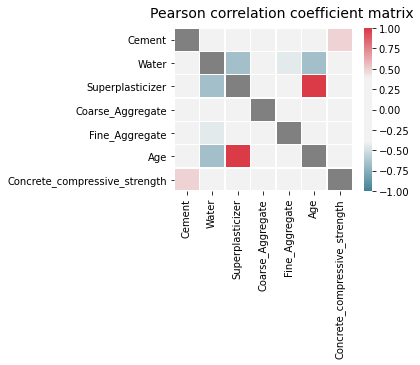

In [63]:
import seaborn as sns
corrl = dataFrame[['Cement','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age','Concrete_compressive_strength']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corrl)
msk = np.zeros_like(corrl, dtype=bool)
np.fill_diagonal(msk, val=True)
fig, axis = plt.subplots(figsize=(4, 3))
corrmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
corrmap.set_bad('grey')
sns.heatmap(corrl, mask=msk, cmap=corrmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
axis.tick_params(axis='both', which='major', labelsize=10)

### Scatter Plot
- Four scatterplots given from which each scatter plot shows relation between concrete strength vs cement/age/water/superplasticizer 
- The first plot shows relation of CCS with cement, the relation is linearly strong (positive) 
- The second plot shows relation of CCS and water, the linear relation is weak
- Relation between CCS and water shows undefined slope (3rd plot)
- The relation between CCS and superplasticizer which shows a weak positive linear relation (4th plot)

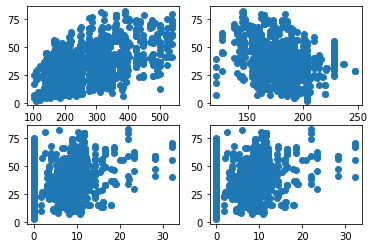

In [64]:
independent_variables = ['Cement','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age']
M = dataFrame[independent_variables]
N = dataFrame.Concrete_compressive_strength
plt.subplot(2,2,1)
plt.scatter(M['Cement'],N)
plt.subplot(2,2,2)
plt.scatter(M['Water'],N)
plt.subplot(2,2,3)
plt.scatter(M['Age'],N)
plt.subplot(2,2,4)
plt.scatter(M['Superplasticizer'],N)

### 3D Scatter Plot
- The plot shows the relation between concrete strength, fine and coarse aggregate
- The points show a negative linear relation between CA, FA, and CCS

Text(0.5, 0, 'Concrete_compressive_strength')

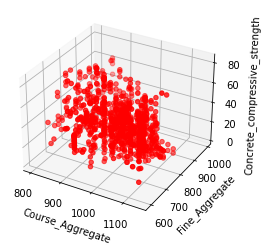

In [65]:
from mpl_toolkits.mplot3d import Axes3D
figr = plt.figure()
axs = figr.add_subplot(111, projection='3d')
m1 = M["Coarse_Aggregate"]
m2 = M["Fine_Aggregate"]
axs.scatter(m1, m2, N, c='r', marker='o')
axs.set_xlabel('Course_Aggregate')
axs.set_ylabel('Fine_Aggregate')
axs.set_zlabel('Concrete_compressive_strength')

## 5. Data Transformation
### Storing Data
The ***target variable*** is stored in variable **N** while other features are stored in variable **M**

In [66]:
N=dataFrame.iloc[:,8]
M=dataFrame.iloc[:,0:7]

### Data Split
The data is split into training and testing set. The training set is used to train the model while the testing set is used to examine the model for efficiency.

In [67]:
from sklearn.model_selection import train_test_split
M_train, M_test, N_train, N_test = train_test_split(M, N, test_size = 0.10, random_state = 0)

### Standard scaling
All high range data is transformed to low range for smooth analysis and pattern finding.

In [68]:
scaler = StandardScaler()
scaler.fit(M_train)
scaler.fit(M_test)

StandardScaler()

## 6. Build Regression Model
### Multiple LR Model (Multiple Linear Regression)
Multiple LR model is trained using the training set

In [69]:
rg = LinearRegression()
mdl=rg.fit(M_train,N_train)

### Prediction on Test Data
This is done by calculating the absolute errors along with calculation of mean in two decimal place

In [70]:
predictions = rg.predict(M_test)
errors = abs(predictions - N_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 8.16 degrees.


### Calculating Accuracy
This is done by calculating the mean absolute percentage from which accuracy is calculated by subtracting 100 from mean of MAPE

In [71]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / N_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 68.21 %.
